In [94]:
# Importamos las librerías que necesitamos

# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Ocultamos las advertencias para evitar mensajes innecesarios
import warnings
warnings.filterwarnings("ignore")

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

## Fase 1: Exploración y Limpieza

In [95]:
# Lo primero que hacemos es cargar el dataframe que vamos a usar
df_vuelos = pd.read_csv("Customer Flight Activity.csv")
df_vuelos.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [96]:
df_clientes = pd.read_csv("Customer Loyalty History.csv")
df_clientes.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [97]:
# Comprobamos el tamaño de los DataFrames
df_vuelos.shape, df_clientes.shape

((405624, 10), (16737, 16))

In [98]:
# Comprobamos la información de los DataFrames
df_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [99]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [100]:
# Comprobamos la descripción de los DataFrames 
df_vuelos.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [101]:
df_clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [102]:
# Comprobamos la existencia de valores nulos en los DataFrames
df_vuelos.isnull().sum()/df_vuelos.shape[0]*100

Loyalty Number                 0.0
Year                           0.0
Month                          0.0
Flights Booked                 0.0
Flights with Companions        0.0
Total Flights                  0.0
Distance                       0.0
Points Accumulated             0.0
Points Redeemed                0.0
Dollar Cost Points Redeemed    0.0
dtype: float64

In [103]:
df_clientes.isnull().sum()/df_clientes.shape[0]*100

Loyalty Number         0.000000
Country                0.000000
Province               0.000000
City                   0.000000
Postal Code            0.000000
Gender                 0.000000
Education              0.000000
Salary                25.321145
Marital Status         0.000000
Loyalty Card           0.000000
CLV                    0.000000
Enrollment Type        0.000000
Enrollment Year        0.000000
Enrollment Month       0.000000
Cancellation Year     87.650117
Cancellation Month    87.650117
dtype: float64

In [104]:
# Borramos las columnas con muchos valores nulos
df_clientes = df_clientes.drop(columns=['Cancellation Year', 'Cancellation Month'])

In [105]:
df_clientes.isnull().sum()/df_clientes.shape[0]*100

Loyalty Number       0.000000
Country              0.000000
Province             0.000000
City                 0.000000
Postal Code          0.000000
Gender               0.000000
Education            0.000000
Salary              25.321145
Marital Status       0.000000
Loyalty Card         0.000000
CLV                  0.000000
Enrollment Type      0.000000
Enrollment Year      0.000000
Enrollment Month     0.000000
dtype: float64

In [106]:
df_clientes.shape

(16737, 14)

In [107]:
# Comprobamos los duplicados en los DataFrames
df_vuelos.duplicated().sum()

1864

In [108]:
df_clientes.duplicated().sum()

0

In [109]:
df_vuelos= df_vuelos.drop_duplicates()
df_vuelos.shape

(403760, 10)

In [110]:
# Unimos los DataFrames
df = df_vuelos.merge(df_clientes, on='Loyalty Number', how='left')
df.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1


In [111]:
# Comprobamos las dimeensiones
df.shape

(403760, 23)

In [112]:
# Comprobamos si hay duplicados después de la unión
df.duplicated().sum()

0

In [113]:
# Comprabamos si hay valores nulos después de la unión
df.isnull().sum()/df.shape[0]*100

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.326927
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
dtype: float64

## Fase 2: Visualización

In [ ]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

# Agrupamos por mes y sumamos los vuelos reservados
vuelos_por_mes = df.groupby('Month')['Flights Booked'].sum().reset_index()
vuelos_por_mes


,Month,Flights Booked
0,1,96936
1,2,96334
2,3,131199
3,4,112511
4,5,142170
5,6,173242
6,7,193431
7,8,169204
8,9,136379
9,10,129461


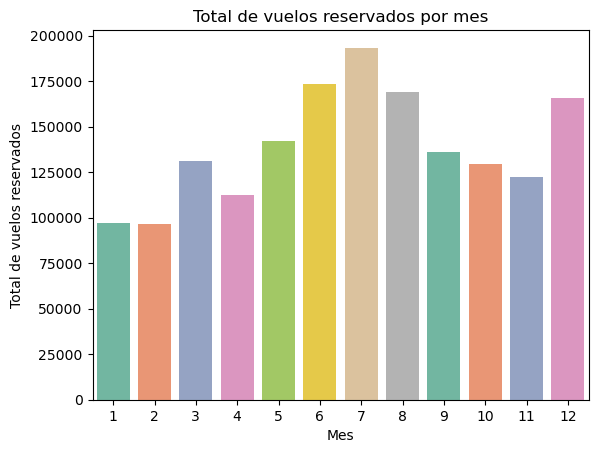

In [115]:
# Visualizamos los datos
sns.barplot(data=vuelos_por_mes, x='Month', y='Flights Booked', palette='Set2')
plt.title("Total de vuelos reservados por mes")
plt.xlabel("Mes")
plt.ylabel("Total de vuelos reservados")
plt.show()

Este gráfico muestra el total de vuelos reservados por mes. Se observa un aumento progresivo desde enero hasta julio, con un pico máximo a mitad de año. Posteriormente, hay una ligera caída en otoño, y un nuevo repunte en diciembre, lo cual podría deberse a la temporada navideña.

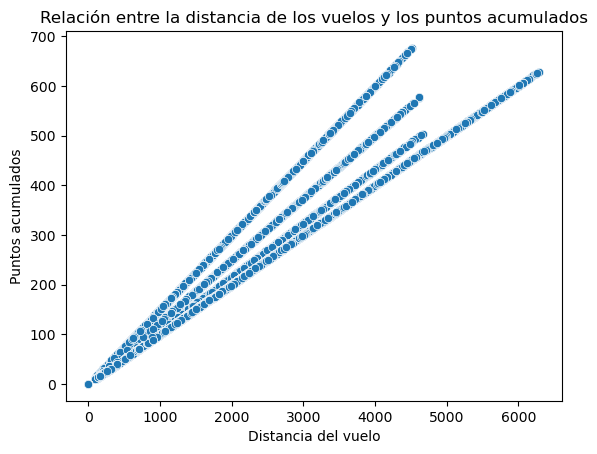

In [121]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

sns.scatterplot(data=df, x='Distance', y='Points Accumulated', palette='Set2')
plt.title("Relación entre la distancia de los vuelos y los puntos acumulados")
plt.xlabel("Distancia del vuelo")
plt.ylabel("Puntos acumulados")
plt.show()

El gráfico muestra una relación lineal entre ambas variables. A mayor distancia recorrida en vuelos, mayor número de puntos acumulados por el cliente.

In [143]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado?

# Contar clientes únicos por provincia
df_clientes_por_provincia = df[['Loyalty Number', 'Province']].drop_duplicates()
df_clientes_por_provincia = df_clientes_por_provincia['Province'].value_counts().reset_index()
df_clientes_por_provincia.columns = ['Province', 'NumClientes']

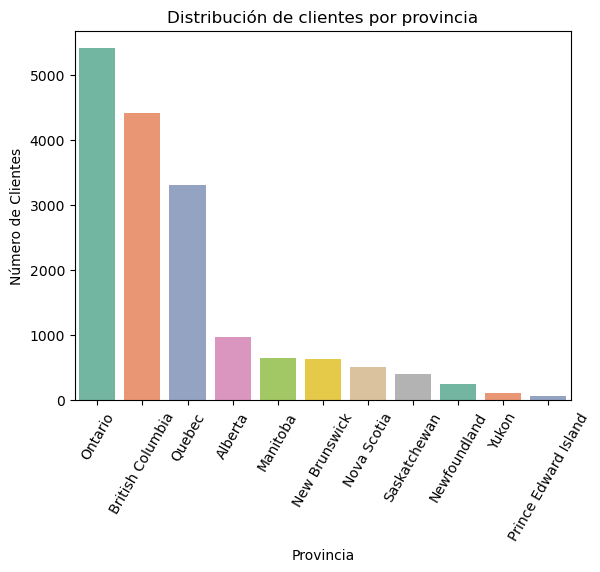

In [144]:
# Visualizamos los datos
sns.barplot(data=df_clientes_por_provincia, x='Province', y='NumClientes', palette='Set2')
plt.title("Distribución de clientes por provincia")
plt.xlabel("Provincia")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=60)
plt.show()

El gráfico muestra que Ontario y British Columbia son las provincias con más clientes registrados en el programa de fidelidad.

In [152]:
# 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

# Agrupamos por nivel educativo y calculamos el salario promedio
df_salario_educacion = df.groupby('Education')['Salary'].mean().reset_index()
df_salario_educacion

,Education,Salary
0,Bachelor,72473.471154
1,College,NaN
2,Doctor,178403.675202
3,High School or Below,61019.926143
4,Master,103734.523724


In [153]:
# Eliminamos los valores nulos
df_salario_educacion = df_salario_educacion.dropna()

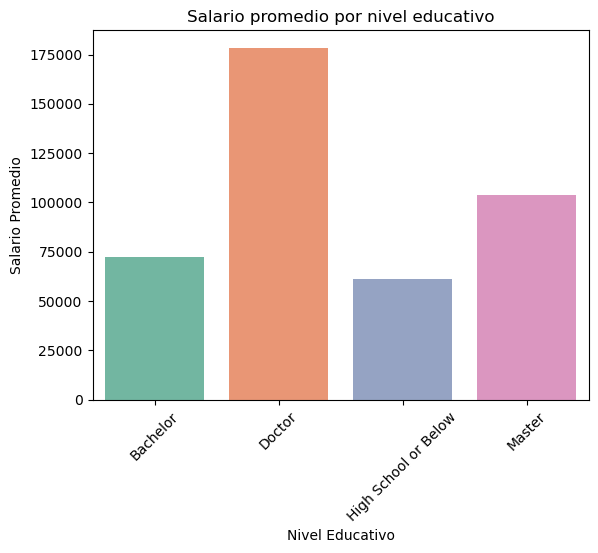

In [155]:
# Visualizamos los datos
sns.barplot(x=df_salario_educacion['Education'], y=df_salario_educacion['Salary'], palette='Set2')
plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Salario Promedio")
plt.xticks(rotation=45)
plt.show()

Este gráfico muestra el salario promedio de los clientes según su nivel educativo. Se observa que a mayor nivel de estudios mayor es el salario.
El nivel educativo "College" no aparece en el gráfico porque no se registraron datos de salario para ese grupo.

In [162]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
df_tarjetas_fidelidad = df.groupby('Loyalty Card')['Loyalty Number'].nunique().reset_index()
df_tarjetas_fidelidad

,Loyalty Card,Loyalty Number
0,Aurora,3429
1,Nova,5671
2,Star,7637


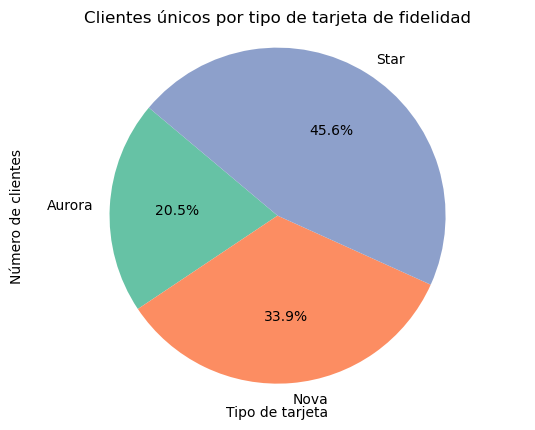

In [165]:
# Visualizamos los datos
plt.pie(df_tarjetas_fidelidad['Loyalty Number'], labels=df_tarjetas_fidelidad['Loyalty Card'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.axis('equal')  # Para que el gráfico sea un círculo
plt.title("Clientes únicos por tipo de tarjeta de fidelidad")
plt.xlabel("Tipo de tarjeta")
plt.ylabel("Número de clientes")
plt.show()

El gráfico muestra la proporción de clientes únicos por tipo de tarjeta de fidelidad, casi la mitad de los clientes tienen la tarjeta Start (45,63%), seguido por la tarjeta Nova (33,88%) y la que menor porcentaje de clientes tiene es la Aurora (20,49%).

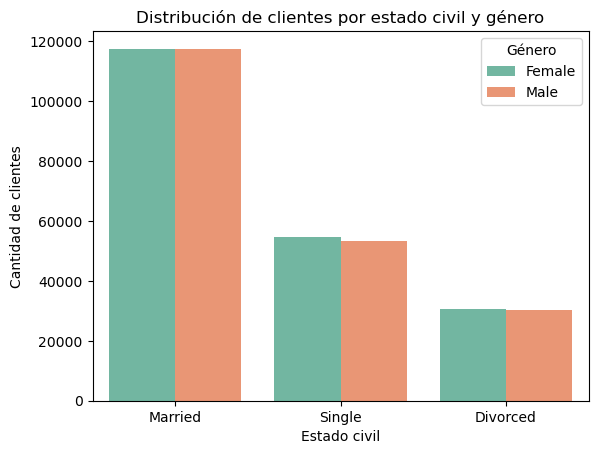

In [167]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

sns.countplot(data=df, x='Marital Status', hue='Gender', palette='Set2')
plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=0)
plt.legend(title='Género')
plt.show()


Podemos ver que por género no hay apenas diferencias en la distribución del estado civil. Sin embargo, entre los distintos tipos de estado civil sí se aprecia una gran diferencia: los clientes casados representan más de la mitad del total, seguidos por los solteros y, en menor medida, los divorciados.

## BONUS

## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

In [172]:
# 1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:'Flights Booked' y 'Education'
df_vuelos_educacion = df[['Flights Booked', 'Education']]
df_vuelos_educacion.head()

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor


In [ ]:
# 2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.
estadisticas_educacion = round(df_vuelos_educacion.groupby('Education')['Flights Booked'].agg(['mean', 'median', 'var', 'std']).reset_index(), 2)
estadisticas_educacion

,Education,mean,median,var,std
0,Bachelor,4.11,1.0,27.27,5.22
1,College,4.17,1.0,27.52,5.25
2,Doctor,4.18,1.0,27.64,5.26
3,High School or Below,4.18,1.0,27.45,5.24
4,Master,4.20,1.0,27.19,5.21
